In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('salaries.csv')

In [6]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [8]:
X = df.drop('salary_more_then_100k', axis = 'columns')
y = df['salary_more_then_100k']

In [14]:
dummyDF = pd.get_dummies(df[['company', 'job', 'degree']])

In [24]:
X = dummyDF
print(X.head())

   company_abc pharma  company_facebook  company_google  job_business manager  \
0                   0                 0               1                     0   
1                   0                 0               1                     0   
2                   0                 0               1                     1   
3                   0                 0               1                     1   
4                   0                 0               1                     0   

   job_computer programmer  job_sales executive  degree_bachelors  \
0                        0                    1                 1   
1                        0                    1                 0   
2                        0                    0                 1   
3                        0                    0                 0   
4                        1                    0                 1   

   degree_masters  
0               0  
1               1  
2               0  
3               1 

In [37]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [38]:
model = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y) 

In [39]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
model.score(X_test, y_test)

0.75

In [43]:
!pip install pydotplus

     |████████████████████████████████| 286kB 27.7MB/s eta 0:00:01
  Stored in directory: /Users/adithyavijaykumar/Library/Caches/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


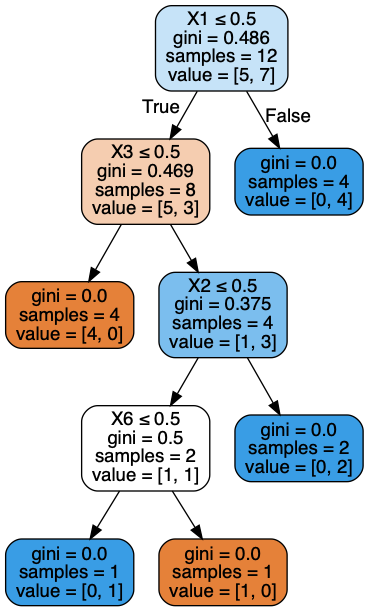

In [44]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())